In [1]:
# Importing the desired libraries
import numpy as np
from tqdm import tqdm

In [2]:
# Reading the data from the file
file = open("./Data/p2p-Gnutella08.txt", "r")
graph = file.read().splitlines()[4:]
file.close()

In [8]:
# Converting the data into tuples where (a,b) represents an edge from a to b
newGraph = [i.split("\t") for i in graph]
newGraph = [[int(j) for j in i] for i in newGraph]

In [9]:
# Creating a list of nodes in the graph
listOfNodes = set()
for i in tqdm(range(len(newGraph))):
    listOfNodes.add(newGraph[i][0])
    listOfNodes.add(newGraph[i][1])

100%|██████████| 20777/20777 [00:00<00:00, 701261.41it/s]


### Adjacency Matrix

In [11]:
# convert to adjacency matrix
# adjacencyMatrix[i,j] = 1 if there is an edge from i to j
# adjacencyMatrix[i,j] = 0 otherwise
adjacencyMatrix = np.zeros((len(listOfNodes), len(listOfNodes)))
for i in tqdm(newGraph):
    adjacencyMatrix[i[0], i[1]] = 1

100%|██████████| 20777/20777 [00:00<00:00, 145530.15it/s]


### Adjacency List

In [12]:
# convert to adjacency list
adjacencyList = {}
# Iterate over all the edges in the graph
for i in tqdm(newGraph):
    # If the source node is already present in the adjacency list
    # Append the destination node to the list of nodes adjacent to the source node
    # Else, add the source node to the adjacency list
    # Add the destination node to the adjacency list as well 
    if i[0] in adjacencyList:
        adjacencyList[i[0]].append(i[1])
        if i[1] not in adjacencyList:
            adjacencyList[i[1]] = []
    else:
        adjacencyList[i[0]] = [i[1]]
        if i[1] not in adjacencyList:
            adjacencyList[i[1]] = []   

100%|██████████| 20777/20777 [00:00<00:00, 565095.38it/s]


### Number of Nodes 

In [13]:
print(f"Number of nodes in the graph: {len(adjacencyList)}")

Number of nodes in the graph: 6301


### Number of Edges

In [15]:
# Summmation of the number of edges in the graph
# The number of edges in the graph = length of the adjacency list of each node
numEdges = 0
for i in adjacencyList:
    numEdges += len(adjacencyList[i])
print(f"Number of edges in the graph: {numEdges}")

Number of edges in the graph: 20777


### Calculation of inDegree and outDegree.

In [26]:
# Calculate the in-degree and out-degree of each node
#  We iterate over all the edges in the graph (a,b) 
#   where a is the source node and b is the destination node
#  When a node is the source node, its out-degree is incremented
#  When a node is the destination node, its in-degree is incremented
nodes = len(listOfNodes)
inDegreeList = dict(zip(list(listOfNodes), [0]*nodes))
outDegreeList = dict(zip(list(listOfNodes), [0]*nodes))
for i in newGraph:
    fromNode = i[0]
    toNode = i[1]
    inDegreeList[toNode] += 1
    outDegreeList[fromNode] += 1

### Average In Degree

In [17]:
print(f"Average In-Degree: {np.mean(list(inDegreeList.values()))}")

Average In-Degree: 3.2974131090303125


### Average Out Degree

In [18]:
print(f"Average Out-Degree: {np.mean(list(outDegreeList.values()))}")

Average Out-Degree: 3.2974131090303125


### Node with max in degree

In [19]:
# Iterate over all the nodes in the graph
#  Find the node with the maximum in-degree
maxInDegree = -1
maxInDegreeNode = -1
for i in tqdm(inDegreeList):
    if inDegreeList[i] > maxInDegree:
        maxInDegree = inDegreeList[i]
        maxInDegreeNode = i

100%|██████████| 6301/6301 [00:00<00:00, 583316.25it/s]


In [20]:
print(f"Node with maximum in-degree: {maxInDegreeNode}, in-degree: {maxInDegree}")

Node with maximum in-degree: 266, in-degree: 91


### Node with max out degree

In [21]:
# Iterate over all the nodes in the graph
#  Find the node with the maximum out-degree
maxOutDegree = -1
maxOutDegreeNode = -1
for i in tqdm(outDegreeList):
    if outDegreeList[i] > maxOutDegree:
        maxOutDegree = outDegreeList[i]
        maxOutDegreeNode = i

100%|██████████| 6301/6301 [00:00<00:00, 557535.75it/s]


In [22]:
print(f"Node with maximum out-degree: {maxOutDegreeNode}, out-degree: {maxOutDegree}")

Node with maximum out-degree: 5831, out-degree: 48


### Density of the Graph

In [23]:
# For directed graph, the maximum number of edges is
# nodes * (nodes - 1)
# Density = total number of edges / maximum number of edges
nodes = len(listOfNodes)
maxEdges = nodes * (nodes - 1)

In [24]:
print(f"Graph density: {numEdges / maxEdges}")

Graph density: 0.0005233989061952878


### Degree distribution of the Network

In [33]:
# ! pip3 install matplotlib

In [34]:
import matplotlib.pyplot as plt

In-degree

In [38]:
# computing frequency of each in-degree value
inDegreeFreq = {}
for node in tqdm(inDegreeList):
    inDegreeVal = inDegreeList[node]
    if inDegreeVal in inDegreeFreq:
        inDegreeFreq[inDegreeVal] += 1
    else:
        inDegreeFreq[inDegreeVal] = 1

100%|██████████| 6301/6301 [00:00<00:00, 505244.12it/s]


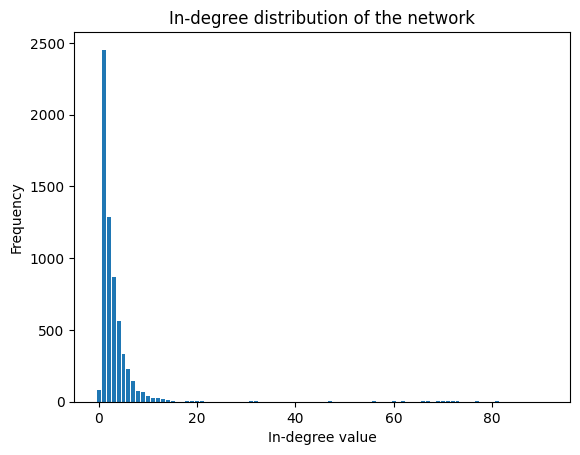

In [49]:
# Plotting the in-degree distribution
x = list(inDegreeFreq.keys())
y = list(inDegreeFreq.values())

plt.bar(x, y)
plt.xlabel('In-degree value')
plt.ylabel('Frequency')
plt.title('In-degree distribution of the network')
plt.show()

Out-degree

In [46]:
# computing frequency of each out-degree value
outDegreeFreq = {}
for node in tqdm(outDegreeList):
    outDegreeVal = outDegreeList[node]
    if outDegreeVal in outDegreeFreq:
        outDegreeFreq[outDegreeVal] += 1
    else:
        outDegreeFreq[outDegreeVal] = 1

100%|██████████| 6301/6301 [00:00<00:00, 297585.94it/s]


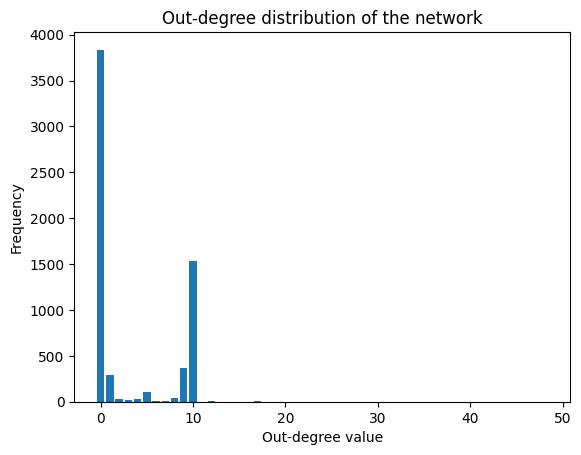

In [50]:
# Plotting the in-degree distribution
x = list(outDegreeFreq.keys())
y = list(outDegreeFreq.values())

plt.bar(x, y)
plt.xlabel('Out-degree value')
plt.ylabel('Frequency')
plt.title('Out-degree distribution of the network')
plt.show()

### Local Clustering Coefficient

In [63]:
# reference for formula to compute lcc - https://en.wikipedia.org/wiki/Clustering_coefficient#:~:text=The%20local%20clustering%20coefficient%20of%20a%20vertex%20(node)%20in%20a,is%20a%20small%2Dworld%20network.

In [90]:
# ! pip3 install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [91]:
import seaborn as sns

In [58]:
# create an undirected adjacency list
adjacencyListUndir = {}
# Iterate over all the edges in the graph
for i in tqdm(newGraph):
    # represent the edge in adjacency list of i[0]
    if i[0] in adjacencyListUndir:
        adjacencyListUndir[i[0]].append(i[1])
    else:
        adjacencyListUndir[i[0]] = [i[1]]

    # represent the edge in adjacency list of i[1]
    if i[1] in adjacencyListUndir:
        adjacencyListUndir[i[1]].append(i[0])
    else:
        adjacencyListUndir[i[1]] = [i[0]]

100%|██████████| 20777/20777 [00:00<00:00, 534170.16it/s]


In [97]:
lcc = {}
for node in adjacencyList:
    # k = number of neighbours of current node
    # neighbourhood includes both type of nodes - nodes to which an edge is going and nodes from which an edge is coming
    # that is why the undirected adjacency list is used
    k = len(adjacencyListUndir[node])

    if(k < 2):
        # there is 1 or 0 nodes in the neighbourhood
        # that means there cannot be any connections among the neighbours
        # so the lcc is set to 0
        lcc[node] = 0
    else:
        count = 0 # number of edges among neighbours

        # iterate over all pairs of nodes in the neighbourhood
        for neighbour1 in adjacencyListUndir[node]:
            for neighbour2 in adjacencyListUndir[node]:
                # if an edge exists from neighbour1 to neighbour2, add 1 to count
                if neighbour1 != neighbour2 and neighbour2 in adjacencyList[neighbour1]: # Note - the directed graph adjacency list is used here because the actual edges are stored here
                    count += 1

        # lcc = 
        #  proportion of links between vertices within a node's neighbourhood
        #  divided by number of links that could possibly exist between them
        totLinks = k * (k-1) # for a directed graph, these are maximum connections possible among the neighbours
        lcc[node] = count / totLinks

In [103]:
# averageLCC = sum(lcc.values()) / len(lcc)
# averageLCC

In [99]:
# computing frequency of each lcc value
lccFreq = {}
for node in tqdm(lcc):
    lccVal = lcc[node]
    if lccVal in lccFreq:
        lccFreq[lccVal] += 1
    else:
        lccFreq[lccVal] = 1

100%|██████████| 6301/6301 [00:00<00:00, 1049117.13it/s]


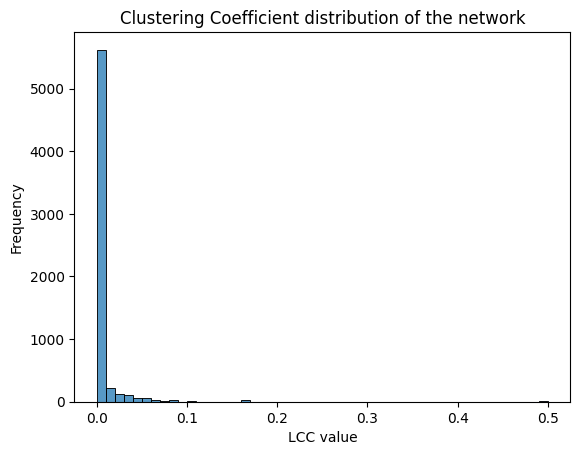

In [100]:
# Plotting the lcc distribution: lcc vs frequency of lcc
keys = list(lccFreq.keys())
values = list(lccFreq.values())

sns.histplot(x = keys, weights = values, binwidth = 0.01)
plt.xlabel('LCC value')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient distribution of the network')
plt.show()